🦜 Uncomment the following code for the [TidyTuesday Bird Bath dataset](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-08-31).🦉

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
 df_birdbath = read_csv(
     'https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-08-31/bird_baths.csv?raw=true',
     col_types = cols()
)

Each row represents the number of times a type of bird was observed at a bird bath in the survey year.

In [3]:
df_birdbath |> head()

survey_year,urban_rural,bioregions,bird_type,bird_count
<dbl>,<chr>,<chr>,<chr>,<dbl>
2014,Urban,South Eastern Queensland,Bassian Thrush,0
2014,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2014,Urban,South Eastern Queensland,Wild Duck,0
2014,Urban,South Eastern Queensland,Willie Wagtail,0
2014,Urban,South Eastern Queensland,Regent Bowerbird,0
2014,Urban,South Eastern Queensland,Rufous Fantail,0


We want to just work with the most numerous birds for baths that have been categorized as "Urban" or "Rural."

Find the top fifteen bird types by total `bird_count` after filtering out baths where `urban_rural` category is not provided. Capture this vector with a variable called `top15_bird_types`. 

Hint: remember `pull` and `slice_max` 

In [4]:
df_birdbath |>
    group_by(bird_type) |>
    filter(urban_rural %in% c('Urban', 'Rural')) |>
    head()

survey_year,urban_rural,bioregions,bird_type,bird_count
<dbl>,<chr>,<chr>,<chr>,<dbl>
2014,Urban,South Eastern Queensland,Bassian Thrush,0
2014,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2014,Urban,South Eastern Queensland,Wild Duck,0
2014,Urban,South Eastern Queensland,Willie Wagtail,0
2014,Urban,South Eastern Queensland,Regent Bowerbird,0
2014,Urban,South Eastern Queensland,Rufous Fantail,0


In [5]:
top15_bird_types = df_birdbath |>
    filter(urban_rural %in% c('Urban', 'Rural')) |>
    group_by(bird_type) |>
    summarize(total_bird_count = sum(bird_count, na.rm = TRUE)) |>
    arrange(desc(total_bird_count)) |>
    slice_max(total_bird_count, n = 15) |> 
    pull(bird_type) 

1. Create a table of just the top birds using the vector of top 15 bird types to filter. Exclude rows with `NA` vlues for `urban_rural`.
1. Group by `bird_type` and `urban_rural` and find the mean `bird_count` for each group.
1. Sort the factor levels for `bird_type` by `bird_count` value at `Rural` baths.
1. Capture the output of these operations under a new variable.

Your final table will have three columns: 1) `bird_type`, 2) `urban_rural` and 3) `mean_bird_count`

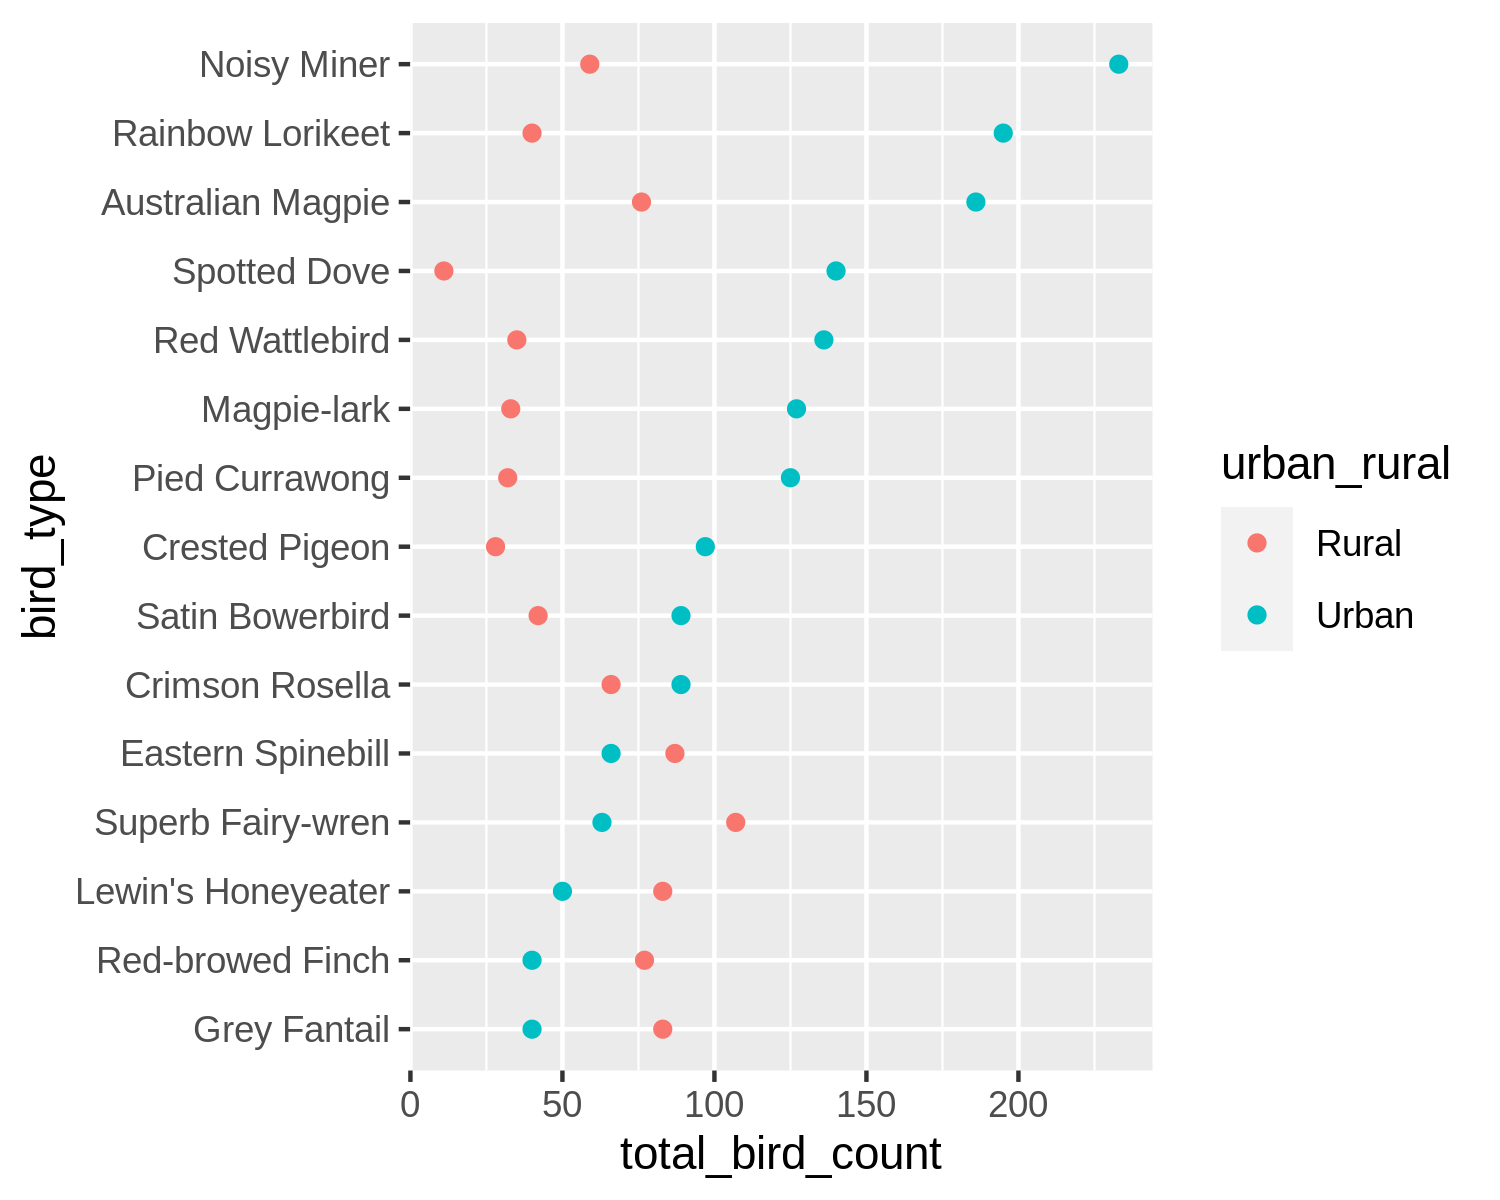

In [21]:
#x axis will be bird count within urban or rural category. 

bird_count_data = df_birdbath |>
    filter(urban_rural %in% c('Urban', 'Rural'), bird_type %in% top15_bird_types) |>
    group_by(bird_type, urban_rural) |> #this gives us tables for each combination of bird type and urban/rural
    summarize(total_bird_count = sum(bird_count, na.rm = T), .groups = 'drop') |>
    arrange(desc(urban_rural), total_bird_count) |>
    mutate(bird_type = fct_inorder(bird_type))

# bird_count_data |> head()

p = ggplot(bird_count_data, aes(y = bird_type, x = total_bird_count, color = urban_rural)) + 
    geom_point()

p

In [24]:
bird_count_data_wide = bird_count_data |>
    pivot_wider(names_from = urban_rural, values_from = total_bird_count)

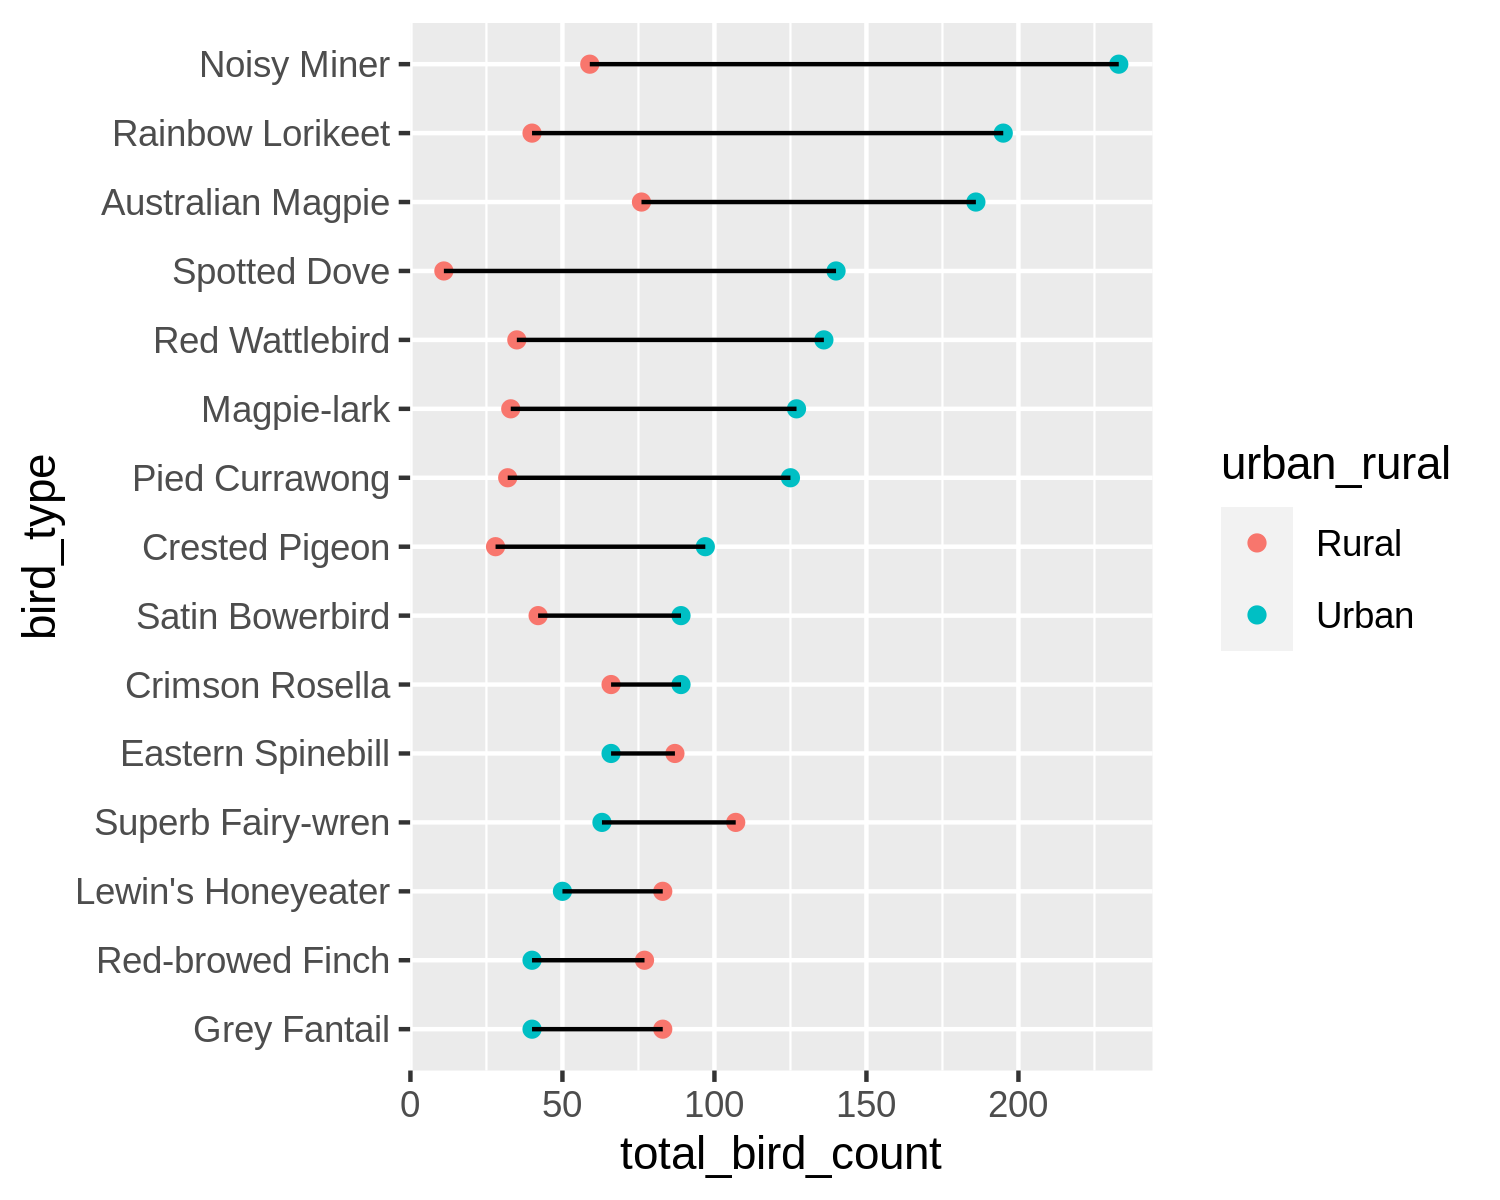

In [30]:
bird_count_data = df_birdbath |>
    filter(urban_rural %in% c('Urban', 'Rural'), bird_type %in% top15_bird_types) |>
    group_by(bird_type, urban_rural) |>
    summarize(total_bird_count = sum(bird_count, na.rm = T), .groups = 'drop') |>
    arrange(desc(urban_rural), total_bird_count) |>
    mutate(bird_type = fct_inorder(bird_type))

bird_count_data_wide = bird_count_data |> 
    pivot_wider(names_from = urban_rural, values_from = total_bird_count)

# bird_count_data |> head()

p = ggplot(bird_count_data, aes(y = bird_type, x = total_bird_count)) + 
    geom_point(mapping = aes(color = urban_rural)) +
    geom_segment(data = bird_count_data_wide, mapping = aes(x = Rural, xend = Urban, yend = bird_type))

p

Make a "Urban"/"Rural" [Cleveland dot chart](https://uc-r.github.io/public/images/visual/cleveland-dotplots/unnamed-chunk-10-1.png) figure with your new table. 

If we want to add "segments" to our dot chart, we need to re-shape our data into "wide" format. Specifically we want to have "Urban" and "Rural" as **columns** instead of **values**.

Use `pivot_wider` to make this wide table, capture it, and use `geom_segment` in combination with your wide table to add segments to your Cleveland dot chart from above 👆.

(Uncomment the code and make the cell below markdown to see my solution.)

In [7]:
# ![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_01_pivot_chart.png?raw=true)